In [4]:
!pip install gdown

In [5]:
# download the already splitted dataset
!gdown --id 1dBCOTJhqVjW5xIuBTvO_uKDyHi-fRV1H -O train_file.json
!gdown --id 194yb_iCcOxORirEZ3rRjOYQ8wZXhFadT -O test_file.json

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dBCOTJhqVjW5xIuBTvO_uKDyHi-fRV1H
To: /kaggle/working/train_file.json
100%|███████████████████████████████████████| 4.23M/4.23M [00:00<00:00, 161MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=194yb_iCcOxORirEZ3rRjOYQ8wZXhFadT
To: /kaggle/working/test_file.json
100%|██████████████████████████████████████| 1.03M/1.03M [00:00<00:00, 99.7MB/s]


In [6]:
import pandas as pd
import numpy as np

# load the already splitted dataset in Pandas
train_data = pd.read_json('train_file.json')
test_data = pd.read_json('test_file.json')

In [4]:
# this cell should be run in the case the user wants to test
# the model on a random split of the dataset, and not on the 
# default dataset that is already splitted

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# donwload raw dataset
# download the negative reviews from GitHub
!wget -O negative_reviews.json https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data/negative_reviews.json

# download the positive reviews from GitHub
!wget -O positive_reviews.json https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data/positive_reviews.json

# load the raw dataset, as negative and positive reviews
negative_reviews = pd.read_json("negative_reviews.json")
positive_reviews = pd.read_json("positive_reviews.json")

# shuffle the dataset
negative_reviews = negative_reviews.sample(frac=1)
positive_reviews = positive_reviews.sample(frac=1)

# split the reviews for training and testing
train_negative_reviews, test_negative_reviews = train_test_split(negative_reviews, test_size=0.2, random_state=42)
train_positive_reviews, test_positive_reviews = train_test_split(positive_reviews, test_size=0.2, random_state=42)
 
# concatenate the train and validation reviews, in order
# to have complete sets of data; also shuffle them again,
# because the positive and negative entries need to be combined
train_data = pd.concat([train_negative_reviews, train_positive_reviews])
test_data = pd.concat([test_negative_reviews, test_positive_reviews])

train_data = train_reviews.sample(frac=1)
test_data = test_reviews.sample(frac=1)

train_data.head()

--2024-05-12 06:42:24--  https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data/negative_reviews.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2818508 (2.7M) [text/plain]
Saving to: 'negative_reviews.json'

negative_reviews.js 100%[===================>]   2.69M  --.-KB/s    in 0.07s   

2024-05-12 06:42:24 (37.6 MB/s) - 'negative_reviews.json' saved [2818508/2818508]

--2024-05-12 06:42:25--  https://raw.githubusercontent.com/ancatache/LaRoSeDa/main/data/positive_reviews.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


,reviews
7150,"{'index': '14651', 'title': 'Nu recomand', 'co..."
3018,"{'index': '10519', 'title': 'Foarte slab', 'co..."
545,"{'index': '546', 'title': 'Excelent', 'content..."
3816,"{'index': '11317', 'title': 'Nu recomand', 'co..."
2102,"{'index': '9603', 'title': 'Lipsa cablu USB. N..."


In [6]:
print("Titlu:")
print(train_data['reviews'][0]['title'])
print("Continut review:")
print(train_data['reviews'][0]['content'])

Titlu:
Nu recomand
Continut review:
castile au venit intr-un ambalaj destul de solid, asemanator cu cel din poza, insa problema este la sunet, care se aude doar in casca stanga. desi pretul este unul mic, tot nu isi merita banii.


In [5]:
nr_negativ = 0
nr_pozitiv = 0
nr_neutru = 0

for review in train_data['reviews']:
  if review['starRating'] == "1" or review['starRating'] == "2":
    nr_negativ += 1
  elif review['starRating'] == "3":
    nr_neutru += 1
  else:
    nr_pozitiv += 1

print("TRAIN DATA")
print(f"nr_negativ = {nr_negativ}")
print(f"nr_neutru = {nr_neutru}")
print(f"nr_pozitiv = {nr_pozitiv}")

TRAIN DATA
nr_negativ = 6000
nr_neutru = 0
nr_pozitiv = 6000


In [6]:
nr_negativ = 0
nr_pozitiv = 0
nr_neutru = 0

for review in test_data['reviews']:
  if review['starRating'] == "1" or review['starRating'] == "2":
    nr_negativ += 1
  elif review['starRating'] == "3":
    nr_neutru += 1
  else:
    nr_pozitiv += 1
    
print("TEST DATA")
print(f"nr_negativ = {nr_negativ}")
print(f"nr_neutru = {nr_neutru}")
print(f"nr_pozitiv = {nr_pozitiv}")

TEST DATA
nr_negativ = 1500
nr_neutru = 0
nr_pozitiv = 1500


In [7]:
missing_entries = []
for review in train_data["reviews"]:
    if 'title' not in review or 'content' not in review:
        missing_entries.append(review)
missing_entries

[]

In [8]:
import re
news_size=[]
for news_content in train_data["reviews"]:
    try:
        news_content=re.sub("[.,!?%/\–]","",news_content['content'])
        news_size.append(len(news_content.split(" ")))
    except:
        continue

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

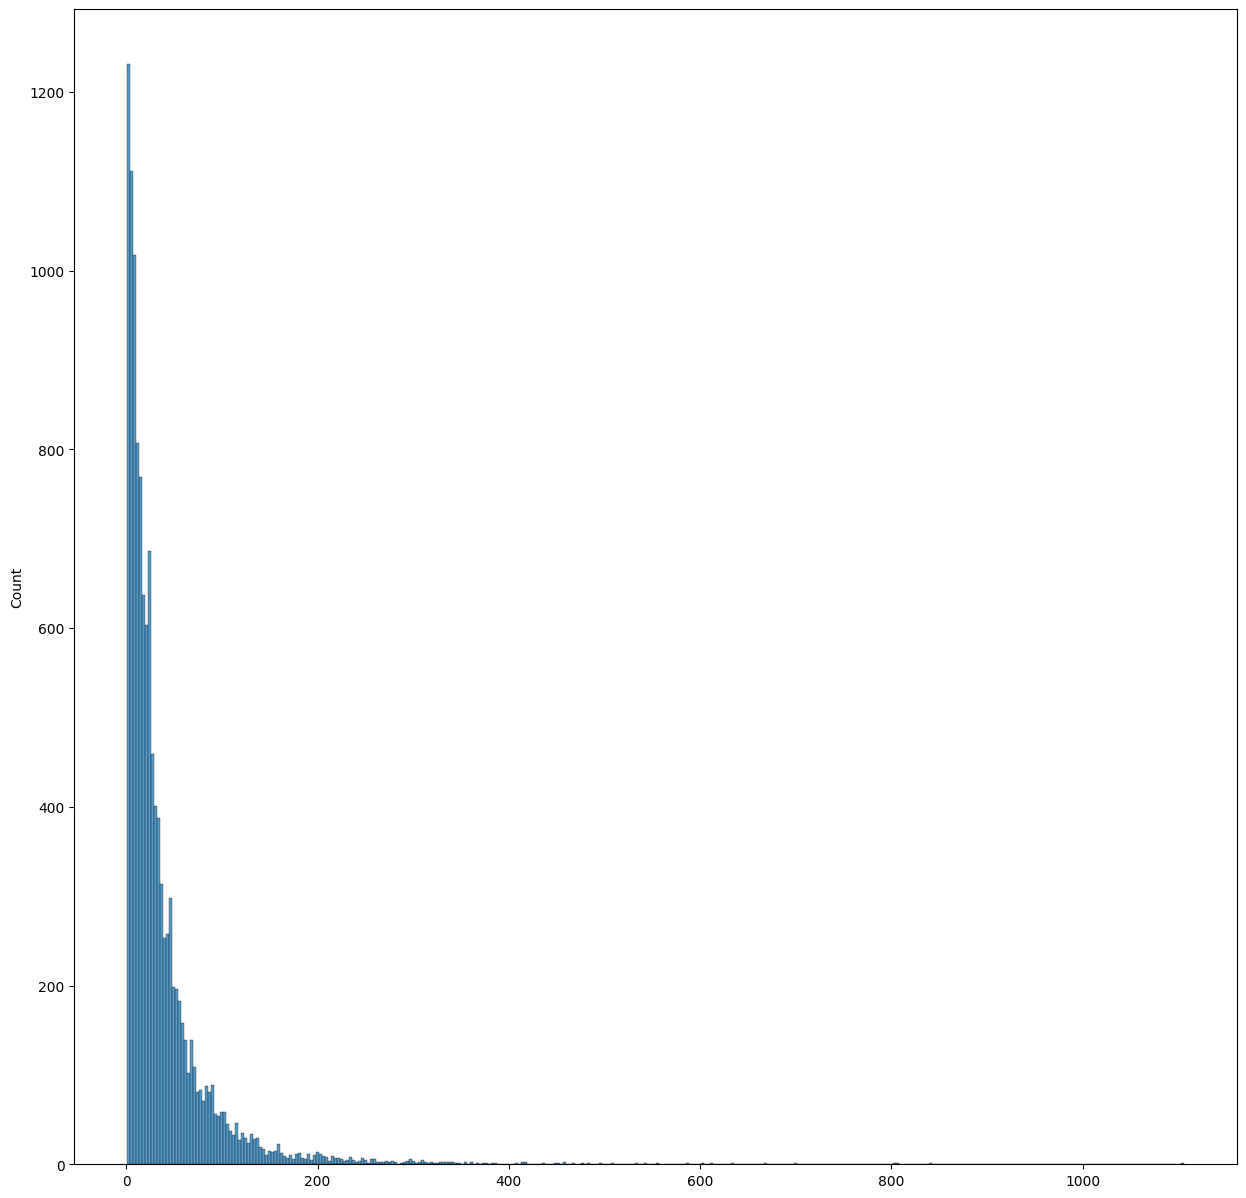

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.histplot(np.array(news_size))

In [7]:
!pip install -U spacy
!python -m spacy download ro_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 94.6 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')


In [15]:
import string

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#import the Romanian stop words from spacy library
nlp = spacy.load('ro_core_news_sm')

# Initialize the Romanian stemmer from NLTK
stemmer = SnowballStemmer('romanian')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization using SpaCy
    doc = nlp(text)
    
    # Remove stop words and stemming
    filtered_tokens = [stemmer.stem(token.text) for token in doc]
    
    return ' '.join(filtered_tokens)

# Example usage
sample_text = "Nu mi-a plăcut filmul pentru că a fost prea lung și plictisitor!"
processed_text = preprocess_text(sample_text)
print(processed_text)


nu mia plăcut film pentru că a fost pre lung și plictis


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('readerbench/RoBERT-small')
model = BertForSequenceClassification.from_pretrained('readerbench/RoBERT-small', num_labels=2)

class ReviewDataset(Dataset):
    def __init__(
        self,
        reviews,
        complete_review: bool, 
        preprocess: bool = False, 
        max_length: int = 512
    ):
        self.inputs = []
        self.labels = []

        for review in reviews:
            title = review['title']
            content = review['content']
            
            # if the complete_review parameter was set to true,
            # the text on which the training is done = title + content
            full_text = f"{title} {content}" if complete_review else content
            full_text = preprocess_text(full_text) if preprocess else full_text
            
            star_rating = int(review.get('starRating', 0))

            # tokenization and encoding the text
            encoded_review = tokenizer.encode_plus(
                full_text,
                add_special_tokens=True,
                max_length=max_length,
                return_token_type_ids=False,
                padding='max_length',
                truncation=True,
                return_attention_mask=True,
                return_tensors='pt',
            )

            # define labels based on star ratings
            label = 1 if star_rating >= 4 else 0

            self.inputs.append({
                'input_ids': encoded_review['input_ids'].flatten(),
                'attention_mask': encoded_review['attention_mask'].flatten()
            })
            self.labels.append(torch.tensor(label, dtype=torch.long))

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # Each item in the dataset is a tuple of the encoding and its corresponding label
        item = {**self.inputs[idx], 'labels': self.labels[idx]}
        return item


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at readerbench/RoBERT-small and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
train_dataset = ReviewDataset(train_data['reviews'], complete_review=False)
test_dataset = ReviewDataset(test_data['reviews'], complete_review=False)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

for data in train_loader:
    print(data['input_ids'], data['attention_mask'], data['labels'])
    break

tensor([[   3,   70,   22,  ...,    0,    0,    0],
        [   3,  194,  868,  ...,    0,    0,    0],
        [   3,  344,  294,  ...,    0,    0,    0],
        [   3,  114, 5912,  ...,    0,    0,    0]]) tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]) tensor([0, 0, 1, 0])


In [24]:
from transformers import AdamW, get_linear_schedule_with_warmup
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device used for training and testing: {device.type}")

model = model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-4)

num_epochs = 4

# Total number of training steps
num_train_steps = len(train_loader) * num_epochs

# Scheduler (optional, for learning rate decay)
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=num_train_steps)


Device used for training and testing: cuda


/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
def train(model, data_loader, optimizer, device, scheduler=None):
    model.train()
    total_loss = 0

    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        model.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        total_loss += loss.item()


    return total_loss / len(data_loader)


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import torch

def evaluate(model, data_loader, device):
    model.eval()
    total_loss = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            preds = torch.argmax(outputs.logits, dim=1)

            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    

    # Calculating metrics
    accuracy = accuracy_score(all_predictions, all_labels)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    
    num_pred_ones = all_predictions.count(1)
    num_pred_zeros = all_predictions.count(0)
    num_label_ones = all_labels.count(1)
    num_label_zeros = all_labels.count(0)

    print("Predictions - Ones:", num_pred_ones, "Zeros:", num_pred_zeros)
    print("Labels - Ones:", num_label_ones, "Zeros:", num_label_zeros)

    return total_loss / len(data_loader), accuracy, precision, recall, f1

In [30]:
num_epochs = 8

for epoch in range(num_epochs):
    print(f'Epoch {epoch + 1}/{num_epochs}')
    train_loss = train(model, train_loader, optimizer, device, scheduler)
    print(f'Train loss: {train_loss}')

    if test_loader:
        val_loss, val_accuracy, val_precision, val_recall, val_f1 = evaluate(model, test_loader, device)
        print(f'Validation loss: {val_loss}')
        print(f'Accuracy: {val_accuracy}')
        print(f'Precision: {val_precision}')
        print(f'Recall: {val_recall}')
        print(f'F1 Score: {val_f1}')

Epoch 1/8
Train loss: 0.16637138261506335
Predictions - Ones: 1283 Zeros: 1717
Labels - Ones: 1500 Zeros: 1500
Validation loss: 0.3080299698555221
Accuracy: 0.901
Precision: 0.9688230709275136
Recall: 0.8286666666666667
F1 Score: 0.8932806324110671
Epoch 2/8
Train loss: 0.1370859982680219
Predictions - Ones: 1500 Zeros: 1500
Labels - Ones: 1500 Zeros: 1500
Validation loss: 0.23711663952531914
Accuracy: 0.924
Precision: 0.924
Recall: 0.924
F1 Score: 0.924
Epoch 3/8
Train loss: 0.0648169007236138
Predictions - Ones: 1516 Zeros: 1484
Labels - Ones: 1500 Zeros: 1500
Validation loss: 0.3082741890102625
Accuracy: 0.9173333333333333
Precision: 0.9129287598944591
Recall: 0.9226666666666666
F1 Score: 0.9177718832891247
Epoch 4/8
Train loss: 0.03512622404610738
Predictions - Ones: 1490 Zeros: 1510
Labels - Ones: 1500 Zeros: 1500
Validation loss: 0.2857451150973017
Accuracy: 0.9273333333333333
Precision: 0.9302013422818792
Recall: 0.924
F1 Score: 0.9270903010033446
Epoch 5/8


KeyboardInterrupt: 

In [13]:
# save the model's parameters as a dictionary
model_path = "/kaggle/working/model_state_dict.pth"
torch.save(model.state_dict(), model_path)

In [14]:
# save the full model
full_model_path = "/kaggle/working/full_model.pth"
torch.save(model, full_model_path)

In [1]:
def analyse_single_review(title: str, content: str) -> None:
    full_text = f"{title} {content}"

    # tokenize the text
    encoded_review = tokenizer.encode_plus(
        full_text,
        add_special_tokens=True,
        max_length=512,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    label = 1

    # get the ids of the words and the attention mask
    data = {
        'input_ids': encoded_review['input_ids'].flatten(),
        'attention_mask': encoded_review['attention_mask'].flatten()
    }

    # feed forward to the model
    outputs = model(
        data["input_ids"].unsqueeze(0).to(device), 
        attention_mask=data["attention_mask"].unsqueeze(0).to(device), 
        labels=torch.tensor(label, dtype=torch.long).unsqueeze(0).to(device)
    )

    # get the prediction of the model
    prediction = torch.argmax(outputs.logits, dim=1)

    if prediction == 1:
        print("Review-ul este pozitiv!")
    else:
        print("Review-ul este negativ!")
        
analyse_single_review(
    title="Iphone 13 mini",
    content="este un telefon foarte mic, abia il poti sa il tii in mana, cea mai proasta alegere facuta",
)

analyse_single_review(
    title="the god father",
    content="pentru epoca in care a aparut, cred ca este o capodopera, impreuna cu alte filme aparute atunci",
)

analyse_single_review(
    title="televizor LG",
    content="as vrea sa cred ca acest televizor este o gluma",
)

analyse_single_review(
    title="este super",
    content="biroul este foarte bun",
)

NameError: name 'tokenizer' is not defined